# Logistic Regression

## Dataset

In [51]:
import pandas as pd

In [52]:
pembeli_mobil = pd.read_csv('https://raw.githubusercontent.com/mhyubr/Basic_Machine_Learning/main/dataset/calonpembeli_ch5.csv')

**keterangan :**

*   Status | 0 = Single, 1 = Menikah, 2 = Menikah dengan anak, 3 = Duda/janda
*   Kelamin | 0 = Pria, 1 = Wanita
*   Memiliki_Mobil | Jumlah
*   Penghasilan | x100 Juta Rupiah per tahun
*   Beli_Mobil | 0 = Tidak, 1 = Ya




In [53]:
pembeli_mobil.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


## Cleansing Data

In [54]:
pembeli_mobil.isna().sum()

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

In [55]:
pembeli_mobil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [56]:
pembeli_mobil[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan', 'Beli_Mobil']].describe()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


In [57]:
pembeli_mobil[pembeli_mobil['Usia'] >= 100]

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
200,201,164,0,0,0,100,0
227,228,131,2,1,0,100,0


In [58]:
pembeli_mobil.shape

(1000, 7)

In [59]:
pembeli_mobil.drop(pembeli_mobil[pembeli_mobil['Usia'] >= 100].index, inplace=True, axis = 0)

In [60]:
pembeli_mobil.head(10)

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
5,6,39,2,0,1,280,1
6,7,38,2,1,0,150,0
7,8,29,1,1,0,143,0
8,9,30,2,0,0,200,1
9,10,51,1,1,0,174,0


## Split Data

In [61]:
pembeli_mobil['Beli_Mobil'].value_counts()

1    633
0    365
Name: Beli_Mobil, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = pembeli_mobil[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = pembeli_mobil[['Beli_Mobil']]  

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
X_train.size

3990

In [66]:
X_test.size

1000

## Train Model

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
X_train.head()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
694,39,3,0,1,273
518,52,1,1,1,181
882,36,2,1,0,315
113,42,3,0,1,233
873,40,1,1,1,418


In [69]:
y_train.values.ravel()

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,

In [70]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train.values.ravel())

LogisticRegression()

## Predict Data

In [71]:
y_prediksi = lr.predict(X_test)
y_prediksi

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1])

In [72]:
X_test.head()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
272,54,3,0,0,416
727,45,2,1,1,131
31,37,2,1,1,203
344,58,0,0,1,265
606,53,1,0,1,348


In [73]:
y_test.head()

,Beli_Mobil
272,1
727,0
31,0
344,1
606,1


In [74]:
y_prediksi[:5]

array([1, 0, 0, 1, 1])

## Evaluation

In [75]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Text(33.0, 0.5, 'Prediksi\n')

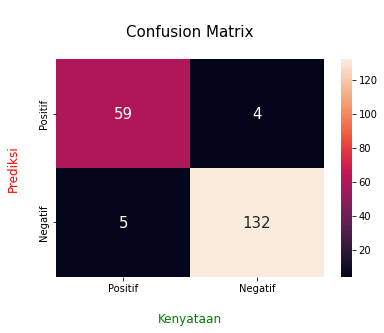

In [76]:
sns.heatmap(confusion_matrix(y_test, y_prediksi), 
            xticklabels=('Positif','Negatif'),
            yticklabels=('Positif','Negatif'),
            fmt='.0f',
            annot_kws={"size" : 15},
            annot=True)

plt.title('\nConfusion Matrix\n', fontsize=15)
plt.xlabel('\nKenyataan', fontsize=12, color='g')
plt.ylabel('Prediksi\n', fontsize=12, color='r')